In [122]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
train_data= open('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw1/train.txt', 'r')
test_data= open('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw1/test.txt', 'r')

In [75]:
# dataset to numpy
np_traindata=np.loadtxt('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw1/train.txt', dtype = 'str')
np_testdata=np.loadtxt('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw1/test.txt', dtype = 'str')

np_train_data=np_traindata.astype(float)
np_test_data=np_testdata.astype(float)

print(np.shape(np_train_data))
print(np.shape(np_test_data))

(1000, 3)
(3000, 3)


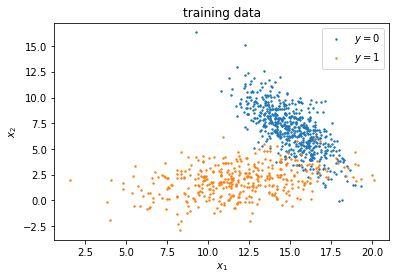

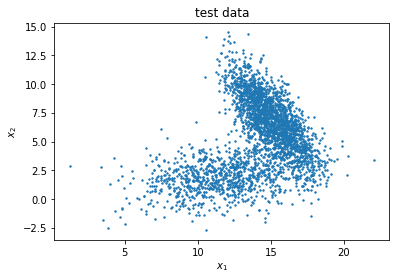

In [428]:
plt.scatter(np_train_data[:,0][:600], np_train_data[:,1][:600], s=2, label='$y=0$') #class0
plt.scatter(np_train_data[:,0][600:], np_train_data[:,1][600:], s=2, label='$y=1$') #class1
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('training data')
plt.legend()
plt.savefig('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw1/traindata.jpg', dpi=300, bbox_inches='tight')
plt.show()

plt.scatter(np_test_data[:,0],np_test_data[:,1], s=2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('test data')
plt.savefig('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw1/testdata.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# k-NN

In [187]:
def distance(a,b):
    # Euclidean distance
    
    temp=a-b
    distance = np.sqrt(np.dot(temp.T, temp))
    
    return distance

# Values
num_traindata=1000
num_testdata=3000
num_class0=600
num_class1=num_traindata-num_class0


In [200]:
# Train
# Calculate distances
distances=np.zeros((num_traindata, num_traindata))
for i in range(num_traindata):
    for j in range(num_traindata):
        if i==j:
            distances[i][j]=10000
        elif distances[j][i]!=0:
            distances[i][j]=distances[j][i]
        else:
            distances[i][j]= distance(np_train_data[i][:2], np_train_data[j][:2])


# Test
# Calculate distances
test_distances=np.zeros((num_testdata, num_traindata))
for i in range(num_testdata):
    for j in range(num_traindata):
        test_distances[i][j]= distance(np_test_data[i][:2], np_train_data[j][:2])

k= 1 -----------------------------------
Training:
Number of errors:  63
Accuracy:  93.7 %
Test:
Number of errors:  172
Accuracy:  27.6 %
k= 5 -----------------------------------
Training:
Number of errors:  61
Accuracy:  93.89999999999999 %
Test:
Number of errors:  145
Accuracy:  28.499999999999996 %
k= 10 -----------------------------------
Training:
Number of errors:  55
Accuracy:  94.5 %
Test:
Number of errors:  133
Accuracy:  28.9 %
k= 15 -----------------------------------
Training:
Number of errors:  59
Accuracy:  94.1 %
Test:
Number of errors:  126
Accuracy:  29.133333333333333 %
k= 20 -----------------------------------
Training:
Number of errors:  59
Accuracy:  94.1 %
Test:
Number of errors:  126
Accuracy:  29.133333333333333 %


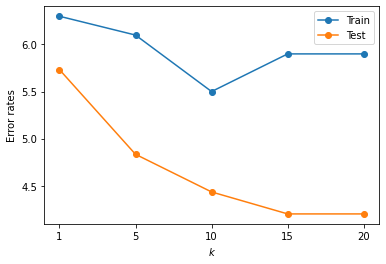

In [206]:
Ks=[1,5,10,15,20]
train_errors=[]
test_errors=[]

for k in Ks:
    print('k=',k,'-----------------------------------')
    # Train with train data            
    predicts=np.copy(np_train_data)
    for i in range(num_traindata):
        distances_i=distances[i]
        indexes_i=distances_i.argsort()[:k]
        labels_i=np_train_data[:,2][indexes_i]

        if (labels_i==0).sum() > (labels_i==1).sum():
            predicts[i][2]=0
        elif (labels_i==1).sum() > (labels_i==0).sum():
            predicts[i][2]=1

    # Training error
    errors=(predicts[:,2]!=np_train_data[:,2]).sum()
    train_errors.append(errors)
    print('Training:')
    print('Number of errors: ', errors)
    print('Accuracy: ', 100*((num_traindata-errors)/num_traindata),'%')
    
    
    # Predict each test data
    test_predicts=np.copy(np_test_data)
    for i in range(num_testdata):
        distances_i=test_distances[i]
        indexes_i=distances_i.argsort()[0]
        labels_i=predicts[:,2][indexes_i]

        if labels_i==0:
            test_predicts[i][2]=0
        elif labels_i==1:
            test_predicts[i][2]=1

    # Test error
    errors=(test_predicts[:,2]!=np_test_data[:,2]).sum()
    test_errors.append(errors)
    print('Test:')
    print('Number of errors: ', errors)
    print('Accuracy: ', 100*((num_traindata-errors)/num_testdata),'%')

    

plt.plot(np.divide(train_errors, num_traindata)*100, 'o-', label='Train')
plt.plot(np.divide(test_errors, num_testdata)*100, 'o-', label='Test')
plt.xticks([0,1,2,3,4], Ks)
plt.xlabel('$k$')
plt.ylabel('Error rates')
plt.legend()
plt.show()

In [ ]:
# Naive Bayes

In [185]:
class0_x1_mean=np.mean(np_train_data[np.where(np_train_data[:,2]==0)][:,0])
class0_x1_std=np.std(np_train_data[np.where(np_train_data[:,2]==0)][:,0])
class0_x2_mean=np.mean(np_train_data[np.where(np_train_data[:,2]==0)][:,1])
class0_x2_std=np.std(np_train_data[np.where(np_train_data[:,2]==0)][:,1])

class1_x1_mean=np.mean(np_train_data[np.where(np_train_data[:,2]==1)][:,0])
class1_x1_std=np.std(np_train_data[np.where(np_train_data[:,2]==1)][:,0])
class1_x2_mean=np.mean(np_train_data[np.where(np_train_data[:,2]==1)][:,1])
class1_x2_std=np.std(np_train_data[np.where(np_train_data[:,2]==1)][:,1])

x1_mean=np.mean(np_train_data[:,0])
x1_std=np.std(np_train_data[:,0])
x2_mean=np.mean(np_train_data[:,1])
x2_std=np.std(np_train_data[:,1])


prior_class0=num_class0/num_traindata
prior_class1=num_class1/num_traindata


def gaussian(x, mean, sigma):
    return (1/ np.sqrt(2*np.pi * sigma**2)) * np.exp(- (x-mean)**2 / (2* sigma**2))

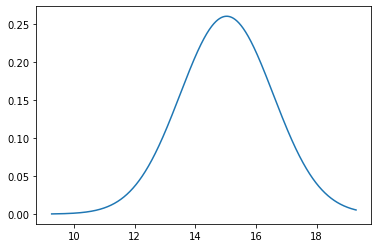

In [429]:
# plot class0_x1

class0_x1_min=np.min(np_train_data[np.where(np_train_data[:,2]==0)][:,0])
class0_x1_max=np.max(np_train_data[np.where(np_train_data[:,2]==0)][:,0])
gaussian_pdf=[]
x=[]
for i in np.arange(class0_x1_min, class0_x1_max,(class0_x1_max-class0_x1_min)/num_samples):
    gaussian_pdf.append(gaussian(i, class0_x1_mean, class0_x1_std))
    x.append(i)

plt.plot(x,gaussian_pdf)
plt.savefig('D:/Dropbox/나메렝/coursework/2022 2학기/통계적패턴인식/Hw1/gaussian.jpg', dpi=300, bbox_inches='tight')

In [228]:
# Predict Training dataset with mean/var from training set

predicts=np.zeros((num_traindata))
for i in range(num_traindata):
    
    #class0
    likelihood_class0=gaussian(np_train_data[i][0], class0_x1_mean, class0_x1_std) * 
    gaussian(np_train_data[i][1], class0_x2_mean, class0_x2_std)

    #class1
    likelihood_class1=gaussian(np_train_data[i][0], class1_x1_mean, class1_x1_std) * 
    gaussian(np_train_data[i][1], class1_x2_mean, class1_x2_std)

    if likelihood_class0 > likelihood_class1:
        predicts[i]=0
    elif likelihood_class0 < likelihood_class1:
        predicts[i]=1
    else:
        print('same posterior')
        break

# errors
errors=(predicts!=np_train_data[:,2]).sum()
print('-------------Training-------------')
print('Number of errors: ', errors, ' /', num_traindata)
print('Accuracy: ', 100*((num_traindata-errors)/num_traindata),'%')






# Predict Test dataset with mean/var from training set

test_predicts=np.zeros((num_testdata))
for i in range(num_testdata):

    #class0
    likelihood_class0=gaussian(np_test_data[i][0], class0_x1_mean, class0_x1_std) * 
    gaussian(np_test_data[i][1], class0_x2_mean, class0_x2_std)

    #class1
    likelihood_class1=gaussian(np_test_data[i][0], class1_x1_mean, class1_x1_std) * 
    gaussian(np_test_data[i][1], class1_x2_mean, class1_x2_std)

    
    if likelihood_class0 > likelihood_class1:
        test_predicts[i]=0
    elif likelihood_class0 < likelihood_class1:
        test_predicts[i]=1
    else:
        print('same posterior')
        break

# errors
errors=(test_predicts!=np_test_data[:,2]).sum()
print('-------------Test-------------')
print('Number of errors: ', errors, ' /', num_testdata)
print('Accuracy: ', 100*((num_testdata-errors)/num_testdata),'%')

-------------Training-------------
Number of errors:  70  / 1000
Accuracy:  93.0 %
-------------Test-------------
Number of errors:  194  / 3000
Accuracy:  93.53333333333333 %


In [229]:
import pandas as pd
import seaborn as sns

def plotLog(log):  # weight가 업데이트되어가는 로그
    df = pd.DataFrame(log)
    df.columns = ['x','y']
    df['z'] = np.array(list(range(len(df))))
  #  df['z'] = np.log(df['z']+1)
    sns.scatterplot(data=df, x='x', y='y', hue='z')

    
    
def adam(gfx, x, theta, ir=2, alpha = 0.1, beta1 = 0.9, beta2 = 0.999, epsilon = 10e-8, th=0.00001): 
    #alpha= learning_rate
    #ir=2, alpha = 0.1, beta1 = 0.9, beta2 = 0.999, epsilon = 10e-8, th=0.00001
    m = 0
    v = 0
    t = 1
    log = np.array([])
    while t < ir:
        log = np.append(log, theta)
        gx = gfx(x, theta)
        m = beta1 * m + (1 - beta1) * gx
        v = beta2 * v + (1- beta2) * gx **2
        mh = m / (1 - beta1 ** t)  # m hat
        vh = v / (1 - beta2 ** t)  # v hat
        theta_new = theta - alpha * mh / (vh ** (1/2) + epsilon)
        
        if(sum(abs(theta-theta_new)) <th):
                break
        theta = theta_new
        t += 1
    log = log.reshape(len(log)//2, 2)
    return theta, t, log

In [ ]:
# Train theta

def fx(x, theta):
    theta1, theta2= theta
    return -(1/2)*np.log(2*np.pi*theta2) - (1/(2*theta2))*((x-theta1)**2)

def gfx(x, theta):
    theta1, theta2= theta
    gradient_theta1= (1/theta2)*(x-theta1)
    gradient_theta2= -(1/(2*theta2)) + ((x-theta1)**2)/(2* theta2**2)
    return np.array([gradient_theta1, gradient_theta2])



class0_feature1_theta=[20,3]
class0_feature2_theta=[20,3]
class1_feature1_theta=[20,3]
class1_feature2_theta=[20,3]

class0_feature1_theta_log=[]
class0_feature2_theta_log=[]
class1_feature1_theta_log=[]
class1_feature2_theta_log=[]

epoch=50
learning_rate=0.1


for e in range(epoch):
    
    # Train
    for i in range(num_traindata):
        #class 0
        class0_feature1_theta, _, log_1 = adam(gfx, np_train_data[i][0], class0_feature1_theta, alpha=learning_rate)
        class0_feature2_theta, _, log_2 = adam(gfx, np_train_data[i][1], class0_feature2_theta, alpha=learning_rate)
        #class 1
        class1_feature1_theta, _, log_3 = adam(gfx, np_train_data[i][0], class1_feature1_theta, alpha=learning_rate)
        class1_feature2_theta, _, log_4 = adam(gfx, np_train_data[i][1], class1_feature2_theta, alpha=learning_rate)

        if i%1000==0:
            class0_feature1_theta_log.append(log_1)
            class0_feature2_theta_log.append(log_2)
            class1_feature1_theta_log.append(log_3)
            class1_feature2_theta_log.append(log_4)
            
        
    
    # Test with training data itself
    predicts=np.zeros((num_traindata))
    for i in range(num_traindata):
        #class0
        log_likelihood_class0_feature1=fx(np_train_data[i][0], class0_feature1_theta)
        log_likelihood_class0_feature2=fx(np_train_data[i][1], class0_feature2_theta)
        log_likelihood_class0= log_likelihood_class0_feature1 + log_likelihood_class0_feature2
        #class1
        log_likelihood_class1_feature1=fx(np_train_data[i][0], class1_feature1_theta)
        log_likelihood_class1_feature2=fx(np_train_data[i][1], class1_feature2_theta)
        log_likelihood_class1= log_likelihood_class1_feature1 + log_likelihood_class1_feature2

        if log_likelihood_class0 > log_likelihood_class1:
            predicts[i]=0
        elif log_likelihood_class0 < log_likelihood_class1:
            predicts[i]=1
        else:
            print('same posterior')
            break


    # errors
    errors=(predicts!=np_train_data[:,2]).sum()
    print('Epoch: ',e)
    print('Number of errors: ', errors, ' /', num_traindata)
    print('Accuracy: ', 100*((num_traindata-errors)/num_traindata),'%')
    
    
    if e==epoch-1:
        for log_idx in range(len(class0_feature1_theta_log)):
            plotLog(class0_feature1_theta_log[log_idx])
        plt.title('class0_feature1_theta')
        plt.legend('',frameon=False)
        plt.show()
        
        for log_idx in range(len(class0_feature2_theta_log)):
            plotLog(class0_feature2_theta_log[log_idx])
        plt.title('class0_feature2_theta')
        plt.legend('',frameon=False)
        plt.show()
        
        for log_idx in range(len(class1_feature1_theta_log)):
            plotLog(class1_feature1_theta_log[log_idx])
        plt.title('class1_feature1_theta')
        plt.legend('',frameon=False)
        plt.show()
        
        for log_idx in range(len(class1_feature2_theta_log)):
            plotLog(class1_feature2_theta_log[log_idx])
        plt.title('class1_feature2_theta')
        plt.legend('',frameon=False)
        plt.show()
    



In [194]:
# linear regression

In [420]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

device='cuda:0'

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
    def forward(self, x, w):
        return F.sigmoid(torch.matmul(x, w[:2])+w[2])
    
  
    
# initial
parameter_w = torch.FloatTensor([np.random.normal(0,1,size=3)]).view(-1, 1)
# parameter_w=parameter_w.to(device)
parameter_w.requires_grad_(True)

optimizer = optim.SGD([parameter_w], lr=0.01)
num_epochs = 200
        
model=LinearRegression()

for epoch in range(num_epochs):
    for i in range(num_traindata):
        # Prediction
        x_train=torch.FloatTensor(np_train_data[i][:2])
        y_train= torch.FloatTensor([np_train_data[i][2]])
        predict = model(x_train, parameter_w)

        # Loss
        loss = nn.MSELoss()(y_train, predict)


        # Update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch%10==0 or epoch==num_epochs-1:
        print("epoch {} -- loss {}".format(epoch, loss.data))

# Output
print('Parameters: ', parameter_w.data.numpy())

C:\Users\hyeli\Anaconda3\envs\hlnam\lib\site-packages\torch\nn\functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0 -- loss 3.696243311424041e-11
epoch 10 -- loss 2.7965517801931128e-05
epoch 20 -- loss 4.375800199341029e-05
epoch 30 -- loss 5.8879886637441814e-05
epoch 40 -- loss 7.151589670684189e-05
epoch 50 -- loss 8.124808664433658e-05
epoch 60 -- loss 8.835794869810343e-05
epoch 70 -- loss 9.333068010164425e-05
epoch 80 -- loss 9.663237869972363e-05
epoch 90 -- loss 9.862767910817638e-05
epoch 100 -- loss 9.959252929547802e-05
epoch 110 -- loss 9.973057603929192e-05
epoch 120 -- loss 9.91943888948299e-05
epoch 130 -- loss 9.810864139581099e-05
epoch 140 -- loss 9.657262125983834e-05
epoch 150 -- loss 9.467254130868241e-05
epoch 160 -- loss 9.248268906958401e-05
epoch 170 -- loss 9.006487380247563e-05
epoch 180 -- loss 8.747604442760348e-05
epoch 190 -- loss 8.476355287712067e-05
epoch 199 -- loss 8.224722114391625e-05
Parameters:  [[ 0.26394004]
 [-1.0627227 ]
 [ 4.516147  ]]


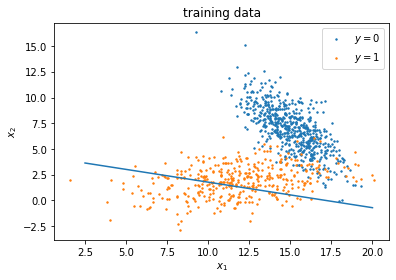

In [425]:
plt.scatter(np_train_data[:,0][:600], np_train_data[:,1][:600], s=2, label='$y=0$') #class0
plt.scatter(np_train_data[:,0][600:], np_train_data[:,1][600:], s=2, label='$y=1$') #class1

x1 = np.linspace(2.5,20)
x2=-(parameter_w[0].item()/parameter_w[1].item())*x1 - parameter_w[2].item()/parameter_w[1].item()
plt.plot(x1, x2)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('training data')
plt.legend()
plt.show()

In [427]:
predicts=np.zeros((num_traindata))
for i in range(num_traindata):
    # Prediction
    x_train=torch.FloatTensor(np_train_data[i][:2])
    predict = model(x_train, parameter_w)
    
    if predict>0.5:
        predicts[i]=1
    else:
        predicts[i]=0
        
errors=(predicts!=np_train_data[:,2]).sum()
print('-------------Train-------------')
print('Number of errors: ', errors, ' /', num_traindata)
print('Accuracy: ', 100*((num_traindata-errors)/num_traindata),'%')


test_predicts=np.zeros((num_testdata))
for i in range(num_traindata):
    # Prediction
    x_test=torch.FloatTensor(np_test_data[i][:2])
    predict = model(x_test, parameter_w)
    
    if predict>0.5:
        test_predicts[i]=1
    else:
        test_predicts[i]=0

errors=(test_predicts!=np_test_data[:,2]).sum()
print('-------------Test-------------')
print('Number of errors: ', errors, ' /', num_testdata)
print('Accuracy: ', 100*((num_testdata-errors)/num_testdata),'%')

-------------Train-------------
Number of errors:  388  / 1000
Accuracy:  61.199999999999996 %
-------------Test-------------
Number of errors:  1442  / 3000
Accuracy:  51.93333333333333 %


C:\Users\hyeli\Anaconda3\envs\hlnam\lib\site-packages\torch\nn\functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
